In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

In [3]:
pwd()

'C:\\Users\\Koushik'

In [4]:
dataset = pd.read_excel("Folds5x2_pp.xlsx") #load dataset
dataset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
dataset.PE.describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

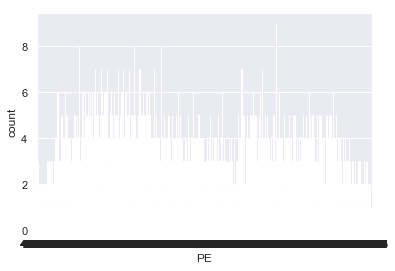

In [6]:
sns.countplot(dataset['PE'],label="Count")

In [85]:
dataset.isnull().head()

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


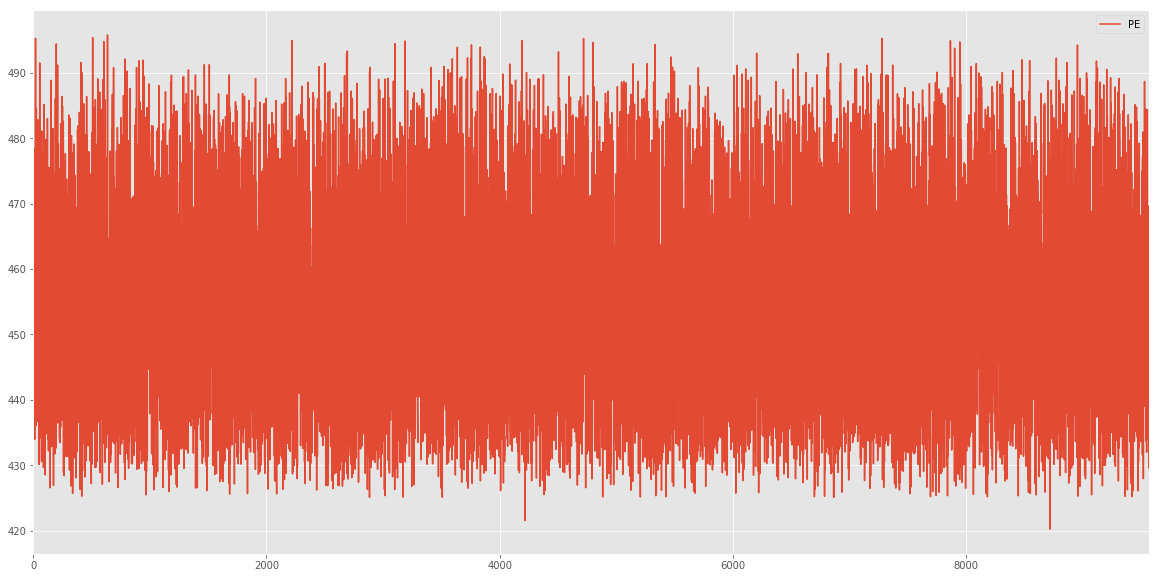

In [22]:
dataset.plot(y="PE",figsize=(20,10))

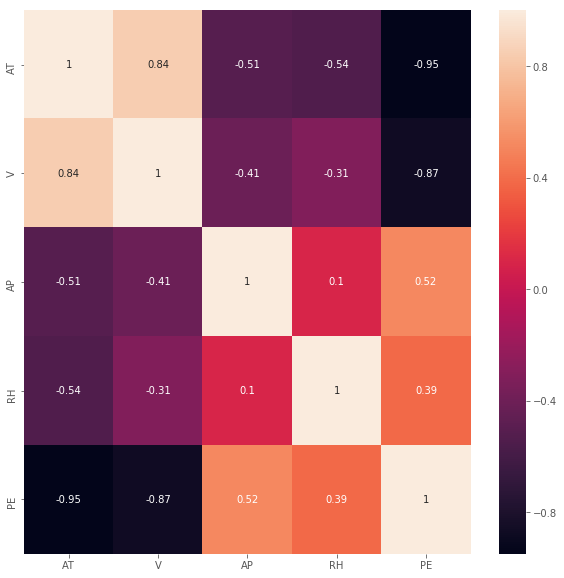

In [23]:
plt.figure(figsize  =(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

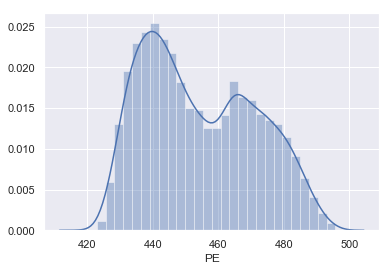

In [86]:
#sns.jointplot('AT', 'PE', data=dataset)
#sns.jointplot('V', 'PE', data=dataset)
#sns.jointplot('AP', 'PE', data=dataset)
#sns.jointplot('RH', 'PE', data=dataset)
sns.distplot(dataset.PE); 

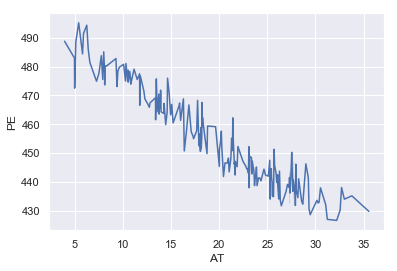

In [88]:
sns.lineplot('AT', 'PE', data=dataset[0:200])

<Figure size 800x640 with 0 Axes>

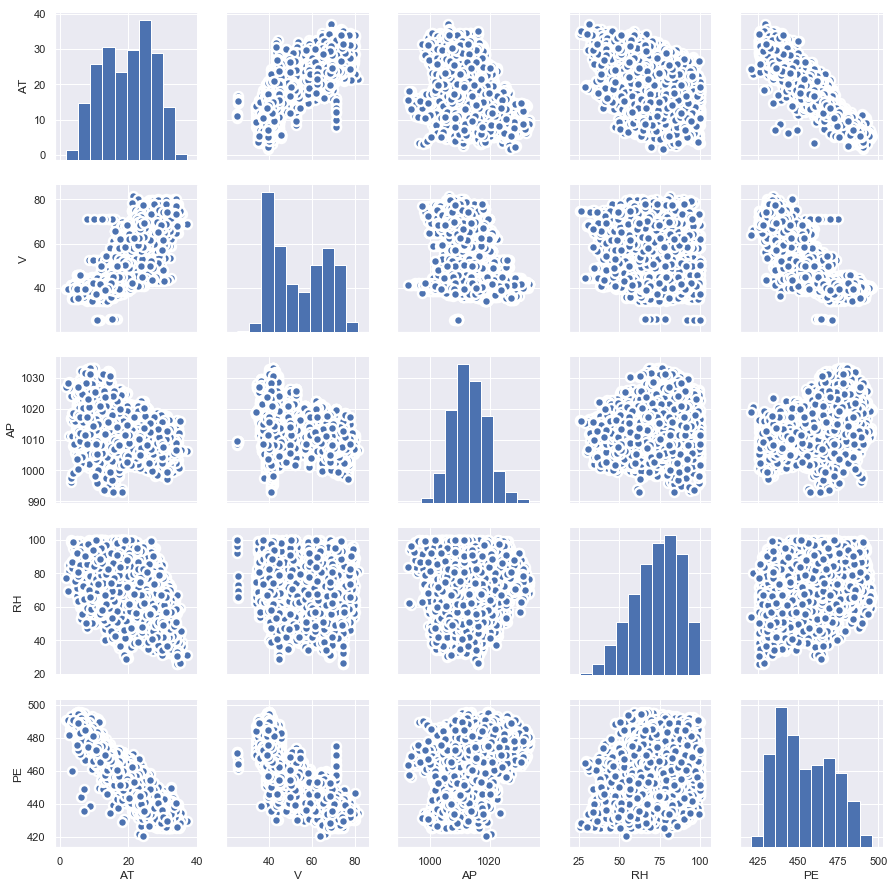

In [42]:
#Pairwise Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(dataset, plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

# Split using random splitting methods

In [7]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [8]:
X_train = train[['AT','V','AP','RH']]
X_test = test[['AT','V','AP','RH']]

In [9]:
Y_train = train['PE']
Y_test = test['PE']

# Machine Learning

In [10]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y_prediction_LR = LR.predict(X_test)

In [12]:
LR.score(X_test,Y_test)

0.9288672286759906

In [13]:
LR.score(X_train, Y_train)

0.9285999601283546

In [15]:
LR_compare = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_LR})
LR_compare.head(10)

,Actual Result,Predicted Result
1,444.37,444.068770
8,475.98,472.004809
14,433.99,435.387909
16,467.54,463.823635
20,468.27,461.648823
21,495.24,487.506147
23,443.61,441.293833
24,436.06,442.634963
27,475.52,479.148773
28,484.41,482.903149


In [16]:
LR_compare['Differences'] = abs(LR_compare['Actual Result'] - LR_compare['Predicted Result'])
LR_compare.head()

,Actual Result,Predicted Result,Differences
1,444.37,444.068770,0.301230
8,475.98,472.004809,3.975191
14,433.99,435.387909,1.397909
16,467.54,463.823635,3.716365
20,468.27,461.648823,6.621177


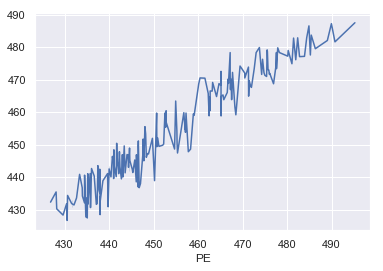

In [18]:
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])

In [19]:
#Support Vector Machine
SVMachine = svm.SVR(kernel='rbf')
SVMachine.fit(X_train, Y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
Y_prediction_SVM = SVMachine.predict(X_test)

In [21]:
SVMachine.score(X_test, Y_test)

0.37719523437376057

In [23]:
SVM_compare = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_SVM})
SVM_compare.head(10)

,Actual Result,Predicted Result
1,444.37,447.249022
8,475.98,452.663833
14,433.99,446.016292
16,467.54,453.214647
20,468.27,454.496072
21,495.24,455.358739
23,443.61,445.440701
24,436.06,450.117158
27,475.52,462.472634
28,484.41,456.426742


In [25]:
SVM_compare ['Differences'] = abs(SVM_compare ['Actual Result'] - SVM_compare ['Predicted Result'])
SVM_compare.head(10)

,Actual Result,Predicted Result,Differences
1,444.37,447.249022,2.879022
8,475.98,452.663833,23.316167
14,433.99,446.016292,12.026292
16,467.54,453.214647,14.325353
20,468.27,454.496072,13.773928
21,495.24,455.358739,39.881261
23,443.61,445.440701,1.830701
24,436.06,450.117158,14.057158
27,475.52,462.472634,13.047366
28,484.41,456.426742,27.983258


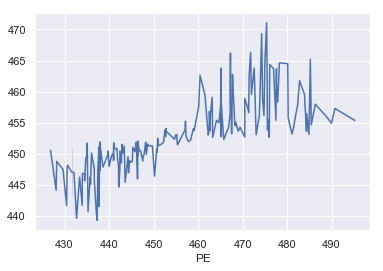

In [55]:
sns.lineplot(Y_test[0:200], Y_prediction_SVM[0:200])

In [27]:
#Random Forest
RF = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)

In [28]:
RF.fit(X_train, Y_train)
Y_prediction_RF = RF.predict(X_test)
RF.score(X_test,Y_test)
dataset = pd.DataFrame({'Actual Result': Y_test, 'Predicted Result': Y_prediction_RF})
dataset['Differences'] = abs(dataset['Actual Result'] - dataset['Predicted Result'])
dataset.head()

,Actual Result,Predicted Result,Differences
1,444.37,438.043824,6.326176
8,475.98,465.488527,10.491473
14,433.99,438.043824,4.053824
16,467.54,450.949157,16.590843
20,468.27,450.949157,17.320843


In [29]:
RF.score(X_test,Y_test)

0.8594613606350755

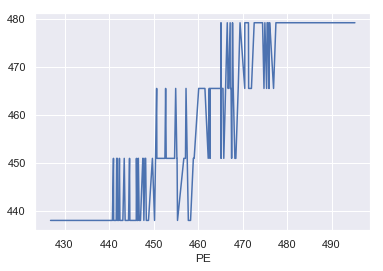

In [30]:
sns.lineplot(Y_test[0:200], Y_prediction_RF[0:200])

In [33]:
#Compare
compare = pd.DataFrame({'Actual Result': Y_test, 'LR Prediction': , 'SVM Prediction': Y_prediction_SVM, 'RF Prediction': Y_prediction_RF})
compare.head(10)

,Actual Result,LR Prediction,SVM Prediction,RF Prediction
1,444.37,444.068770,447.249022,438.043824
8,475.98,472.004809,452.663833,465.488527
14,433.99,435.387909,446.016292,438.043824
16,467.54,463.823635,453.214647,450.949157
20,468.27,461.648823,454.496072,450.949157
21,495.24,487.506147,455.358739,479.147299
23,443.61,441.293833,445.440701,438.043824
24,436.06,442.634963,450.117158,438.043824
27,475.52,479.148773,462.472634,479.147299
28,484.41,482.903149,456.426742,479.147299


In [39]:
ax.plot(Y_test[0:200], Y_prediction_RF[0:200])

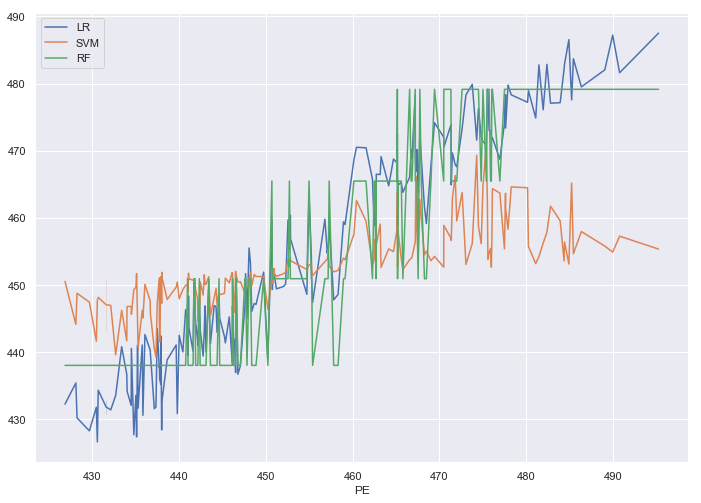

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(Y_test[0:200], Y_prediction_LR[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_SVM[0:200])
sns.lineplot(Y_test[0:200], Y_prediction_RF[0:200])
plt.legend(["LR", "SVM", "RF"])

# Deep Learning: LSTM

In [52]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential